In [50]:
%matplotlib inline

In [51]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [52]:
ori = cv2.pyrDown(cv2.imread("./datasets/1.JPG", cv2.IMREAD_UNCHANGED))

In [53]:
img = ori

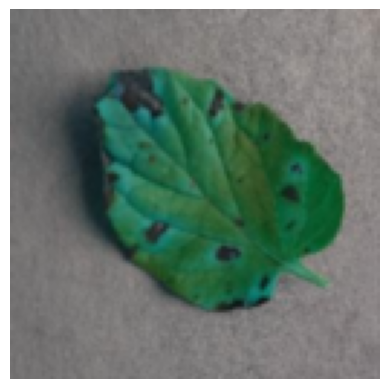

In [54]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [55]:
mask = np.zeros(img.shape[:2], np.uint8)

In [56]:
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

In [57]:
rect = (10, 1, 200, 100)

In [58]:
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[3.07041509e-01, 3.29250022e-01, 1.66828237e-01, 1.00378955e-01,
         9.65012779e-02, 1.38938289e+02, 1.34020379e+02, 1.33566303e+02,
         1.20681478e+02, 1.18681478e+02, 1.18314240e+02, 8.52778658e+01,
         9.31621764e+01, 9.07834126e+01, 1.28696225e+02, 1.25021071e+02,
         1.24162423e+02, 1.01134247e+02, 1.01562557e+02, 1.01705023e+02,
         5.58644467e+01, 5.59889155e+01, 4.95777139e+01, 5.59889155e+01,
         5.64137638e+01, 4.97691712e+01, 4.95777139e+01, 4.97691712e+01,
         4.49580034e+01, 3.42350959e+01, 3.42250959e+01, 3.33003066e+01,
         3.42250959e+01, 3.42350959e+01, 3.33003066e+01, 3.33003066e+01,
         3.33003066e+01, 3.26275274e+01, 1.99215100e+03, 1.57131521e+03,
         1.49519489e+03, 1.57131521e+03, 1.3

In [59]:
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img = img * mask2[:, :, np.newaxis]

In [60]:
cut = img

In [61]:
background = ori - img
background[np.where((background > [0, 0, 0]).all(axis = 2))] = [255, 255, 255]

In [62]:
img = background + img

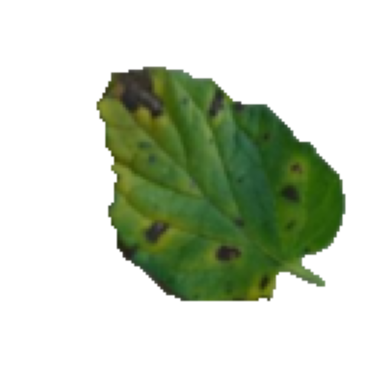

In [63]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [64]:
cut = cv2.cvtColor(cut, cv2.COLOR_BGR2GRAY)

In [65]:
ret, thresh = cv2.threshold(cut, 0.1, 255, cv2.THRESH_BINARY)

In [66]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [67]:
contours

(array([[[ 46,  20]],
 
        [[ 45,  21]],
 
        [[ 44,  21]],
 
        [[ 43,  21]],
 
        [[ 42,  21]],
 
        [[ 41,  21]],
 
        [[ 40,  22]],
 
        [[ 39,  22]],
 
        [[ 38,  22]],
 
        [[ 37,  22]],
 
        [[ 36,  22]],
 
        [[ 35,  22]],
 
        [[ 35,  23]],
 
        [[ 35,  24]],
 
        [[ 34,  25]],
 
        [[ 34,  26]],
 
        [[ 33,  27]],
 
        [[ 33,  28]],
 
        [[ 32,  29]],
 
        [[ 32,  30]],
 
        [[ 31,  31]],
 
        [[ 30,  32]],
 
        [[ 30,  33]],
 
        [[ 30,  34]],
 
        [[ 31,  35]],
 
        [[ 31,  36]],
 
        [[ 31,  37]],
 
        [[ 32,  38]],
 
        [[ 33,  39]],
 
        [[ 33,  40]],
 
        [[ 33,  41]],
 
        [[ 33,  42]],
 
        [[ 33,  43]],
 
        [[ 33,  44]],
 
        [[ 33,  45]],
 
        [[ 33,  46]],
 
        [[ 33,  47]],
 
        [[ 34,  48]],
 
        [[ 35,  49]],
 
        [[ 35,  50]],
 
        [[ 36,  51]],
 
        [[ 36,  

In [68]:
black = np.zeros_like(img)

for cnt in contours:
    epsilon = 0.01 * cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    hull = cv2.convexHull(cnt)
    cv2.drawContours(black, [cnt], -1, (0, 0, 255), 1)
    cv2.drawContours(black, [approx], -1, (0, 0, 255), 1)
    cv2.drawContours(black, [hull], -1, (0, 0, 255), 1)

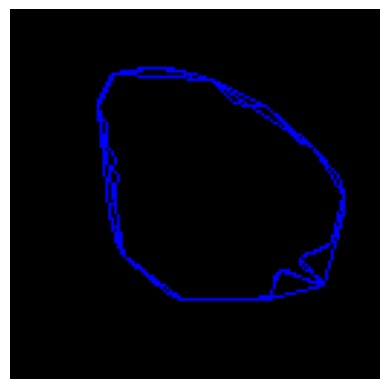

In [69]:
plt.imshow(black)
plt.axis('off')
plt.show()

In [70]:
black.shape

(128, 128, 3)

In [71]:
black = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)

In [72]:
black.shape

(128, 128)

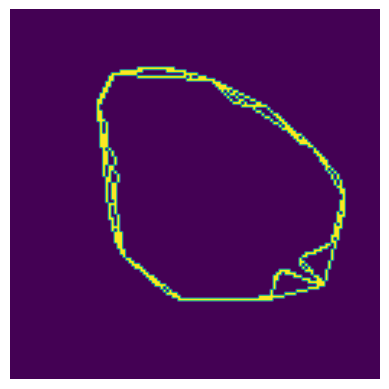

In [73]:
plt.imshow(black)
plt.axis('off')
plt.show()

In [74]:
(y, x) = np.where(black != 0)
(topy, topx) = (np.min(y), np.min(x))
(bottomy, bottomx) = (np.max(y), np.max(x))

img = img[topy:bottomy+1, topx:bottomx+1]

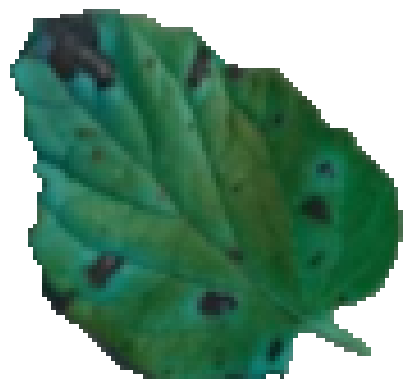

In [75]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [104]:
ret, thresh = cv2.threshold(img, 77, 255, cv2.THRESH_BINARY_INV)

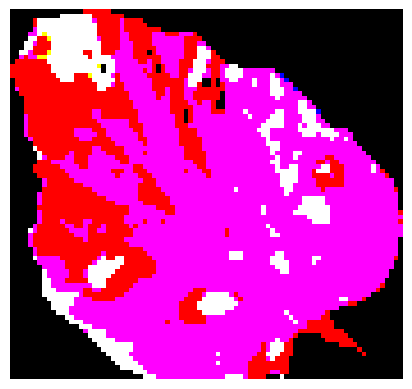

In [105]:
plt.imshow(thresh)
plt.axis('off')
plt.show()

In [150]:
datadir = "../datasets"

pos_dir = "%s/%s" % (datadir, "pos")
pos_pre_dir = "%s/%s/%s" % (datadir, "pos", "pre")

neg_dir = "%s/%s" % (datadir, "neg")
neg_pre_dir = "%s/%s/%s" % (datadir, "neg", "pre")

In [111]:
import os

In [ ]:
def preprocessing(src, path, is_pos=True):
    src = cv2.pyrDown(src)
    dst = src
    mask = np.zeros(ori.shape[:2], np.uint8)

    bdgModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    rect = (3, 3, 120, 120)

    cv2.grabCut(dst, mask, rect, bgdModel, fgdModel, 15, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    dst = dst * mask2[:, :, np.newaxis]

    background = dst - src
    background[np.where((background > [0, 0, 0]).all(axis = 2))] = [255, 255, 255]

    dst = dst + background

    if is_pos == True:
        cv2.imwrite(pos_pre_dir + "/" + os.path.split(path)[1], dst)
    else:
        cv2.imwrite(neg_pre_dir + "/" + os.path.split(path)[1], dst)
    

In [154]:
for posfiles in os.listdir(posdir):
    path = pos_dir + "/" + posfiles
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    
    preprocessing(img, path)
    

error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/pyramids.cpp:865: error: (-215:Assertion failed) !_src.empty() in function 'pyrDown_'


In [152]:
for negfiles in os.listdir(neg_dir):
    path = neg_dir + "/" + negfiles
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    
    preprocessing(img, path)

KeyboardInterrupt: 